In [12]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def check_bridgedrings(mol_check,):
    hits = [item[0] for item in mol_check.GetSubstructMatches(patt)]
    hits_number = len(hits)
    for atom in hits:
        for id_atm in mol_check.GetAtomWithIdx(atom).GetNeighbors():
            if id_atm.GetIdx() in hits:
                hits_number -= 1
                break
    return hits_number > 0

patt = Chem.MolFromSmarts("[x3]")
patt_spiro = Chem.MolFromSmarts("[x4]")
patt_p_bridge = Chem.MolFromSmarts("[x3&!a]")

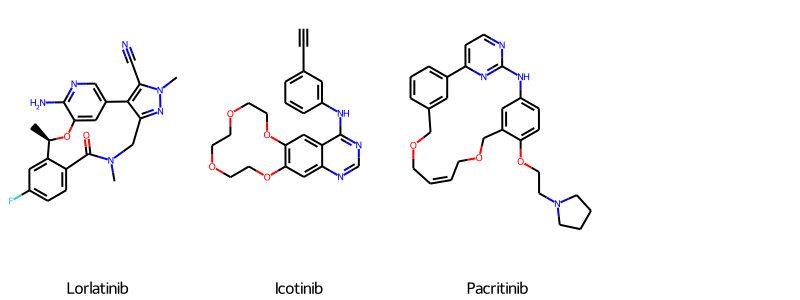

In [9]:
number_big_ring = []
from rdkit.Chem import rdCoordGen
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw
rdDepictor.SetPreferCoordGen(True)
suppl = Chem.SDMolSupplier('/home/chengyj/kinase_work/Bridged_ring/pkidb_rings/approved_kidb.sdf')
for i in suppl:
    rdCoordGen.AddCoords(i)
    ri = i.GetRingInfo()
    if max((len(r) for r in ri.AtomRings()), default=0) >= 12:
        number_big_ring.append(i)
Draw.MolsToGridImage(number_big_ring, molsPerRow=4, legends=[item.GetProp('_Name') for item in number_big_ring],subImgSize=(200,300), )  
        

In [ ]:
suppl = Chem.SDMolSupplier('/home/chengyj/kinase_work/Bridged_ring/pkidb_rings/pkidb_2022-07-18.sdf')
mols = [Chem.MolToSmiles(mol) for mol in suppl if mol]
print(len(mols))
spiro_mols = []
bridge_mols = []
for mol in suppl:
    ri = mol.GetRingInfo()
    largest_ring_size = max((len(r) for r in ri.AtomRings()), default=0)
    if largest_ring_size < 12 and Descriptors.MolWt(mol) <= 1200:
        if mol.HasSubstructMatch(patt_spiro):
            with open("spiro.csv","a") as spiro:
                spiro.write(f" {mol.GetProp('_Name'): <15} {Chem.MolToSmiles(mol)} \n")
                spiro_mols.append(mol)
        if mol.HasSubstructMatch(patt_p_bridge):
            with open("bridged.csv", "a") as bridge:
                bridge.write(f" {mol.GetProp('_Name'): <15} {Chem.MolToSmiles(mol)} \n")
                bridge_mols.append(mol)
        else:
            pass
    else:
        pass
print(len(spiro_mols))
print(len(bridge_mols))

304
6
15


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
suppl = Chem.SDMolSupplier('/home/chengyj/kinase_work/Bridged_ring/pkidb_rings/pkidb_2022-07-18.sdf')
mols = [Chem.MolToSmiles(mol) for mol in suppl if mol]

    

[0.         0.03095238 0.06190476 0.09285714 0.12380952 0.1547619
 0.18571429 0.21666667 0.24761905 0.27857143 0.30952381 0.34047619
 0.37142857 0.40238095 0.43333333 0.46428571 0.4952381  0.52619048
 0.55714286 0.58809524 0.61904762 0.65      ]


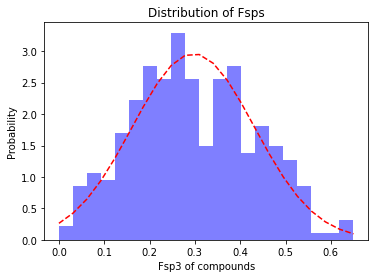

In [31]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
flat = [rdMolDescriptors.CalcFractionCSP3(mol) for mol in suppl]
mu = np.mean(flat)
sigma = np.std(flat)
num_bins = 21
n, bins, patches = plt.hist(flat, num_bins, density=True,stacked=True,facecolor='blue', alpha=0.5)
print(bins)
y = norm.pdf(bins,mu,sigma)
plt.plot(bins, y, 'r--') #绘制y的曲线
plt.xlabel('Fsp3 of compounds') #绘制x轴
plt.ylabel('Probability') #绘制y轴
plt.title(f'Distribution of Fsps')#中文标题 u'xxx' 

plt.subplots_adjust(left=0.15)#左边距 
plt.show() 


In [39]:
with open("/home/chengyj/kinase_work/Bridged_ring/chembl_rings/KI_chembl/data_refined/pkidb_ki.fsp3","w") as out:
    for item in flat:
        print(item,end=" ", file=out)

In [34]:
print(f"{mu:.2f} {sigma:.2f}")

0.30 0.13


(0.5, 1.005)

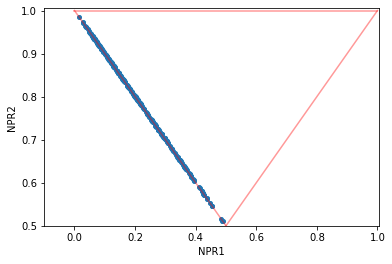

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Descriptors, Descriptors3D, rdMolDescriptors
import seaborn as sns
x = []
y = []
for m in suppl:
    x.append(rdMolDescriptors.CalcNPR1(m))
    y.append(rdMolDescriptors.CalcNPR2(m))
xx = np.linspace(0,1,100)
plt.plot(x, y, 'o', ms=4)
plt.plot(xx, 1-xx, 'r', alpha=0.4)
plt.plot(xx, np.ones(100), 'r', alpha=0.4)
plt.plot(xx, xx, 'r', alpha=0.4)
plt.xlabel('NPR1')
plt.ylabel('NPR2')
plt.xlim(-0.01,1.005)
plt.ylim(0.5,1.005)

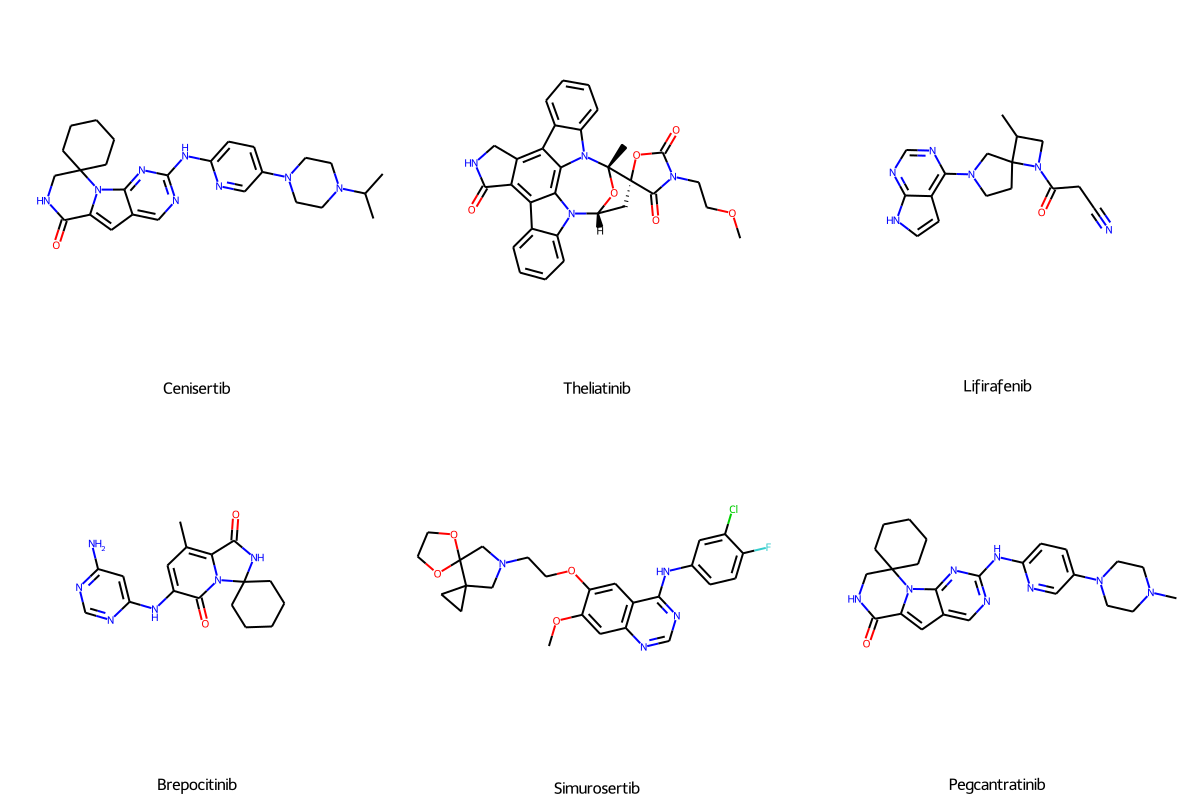

In [26]:
Draw.MolsToGridImage(spiro_mols, molsPerRow=3, legends=[item.GetProp('_Name') for item in bridge_mols],subImgSize=(400,400), )  

In [25]:
bridge_mols[0].GetProp('_Name')

KeyError: '_Phase'

15


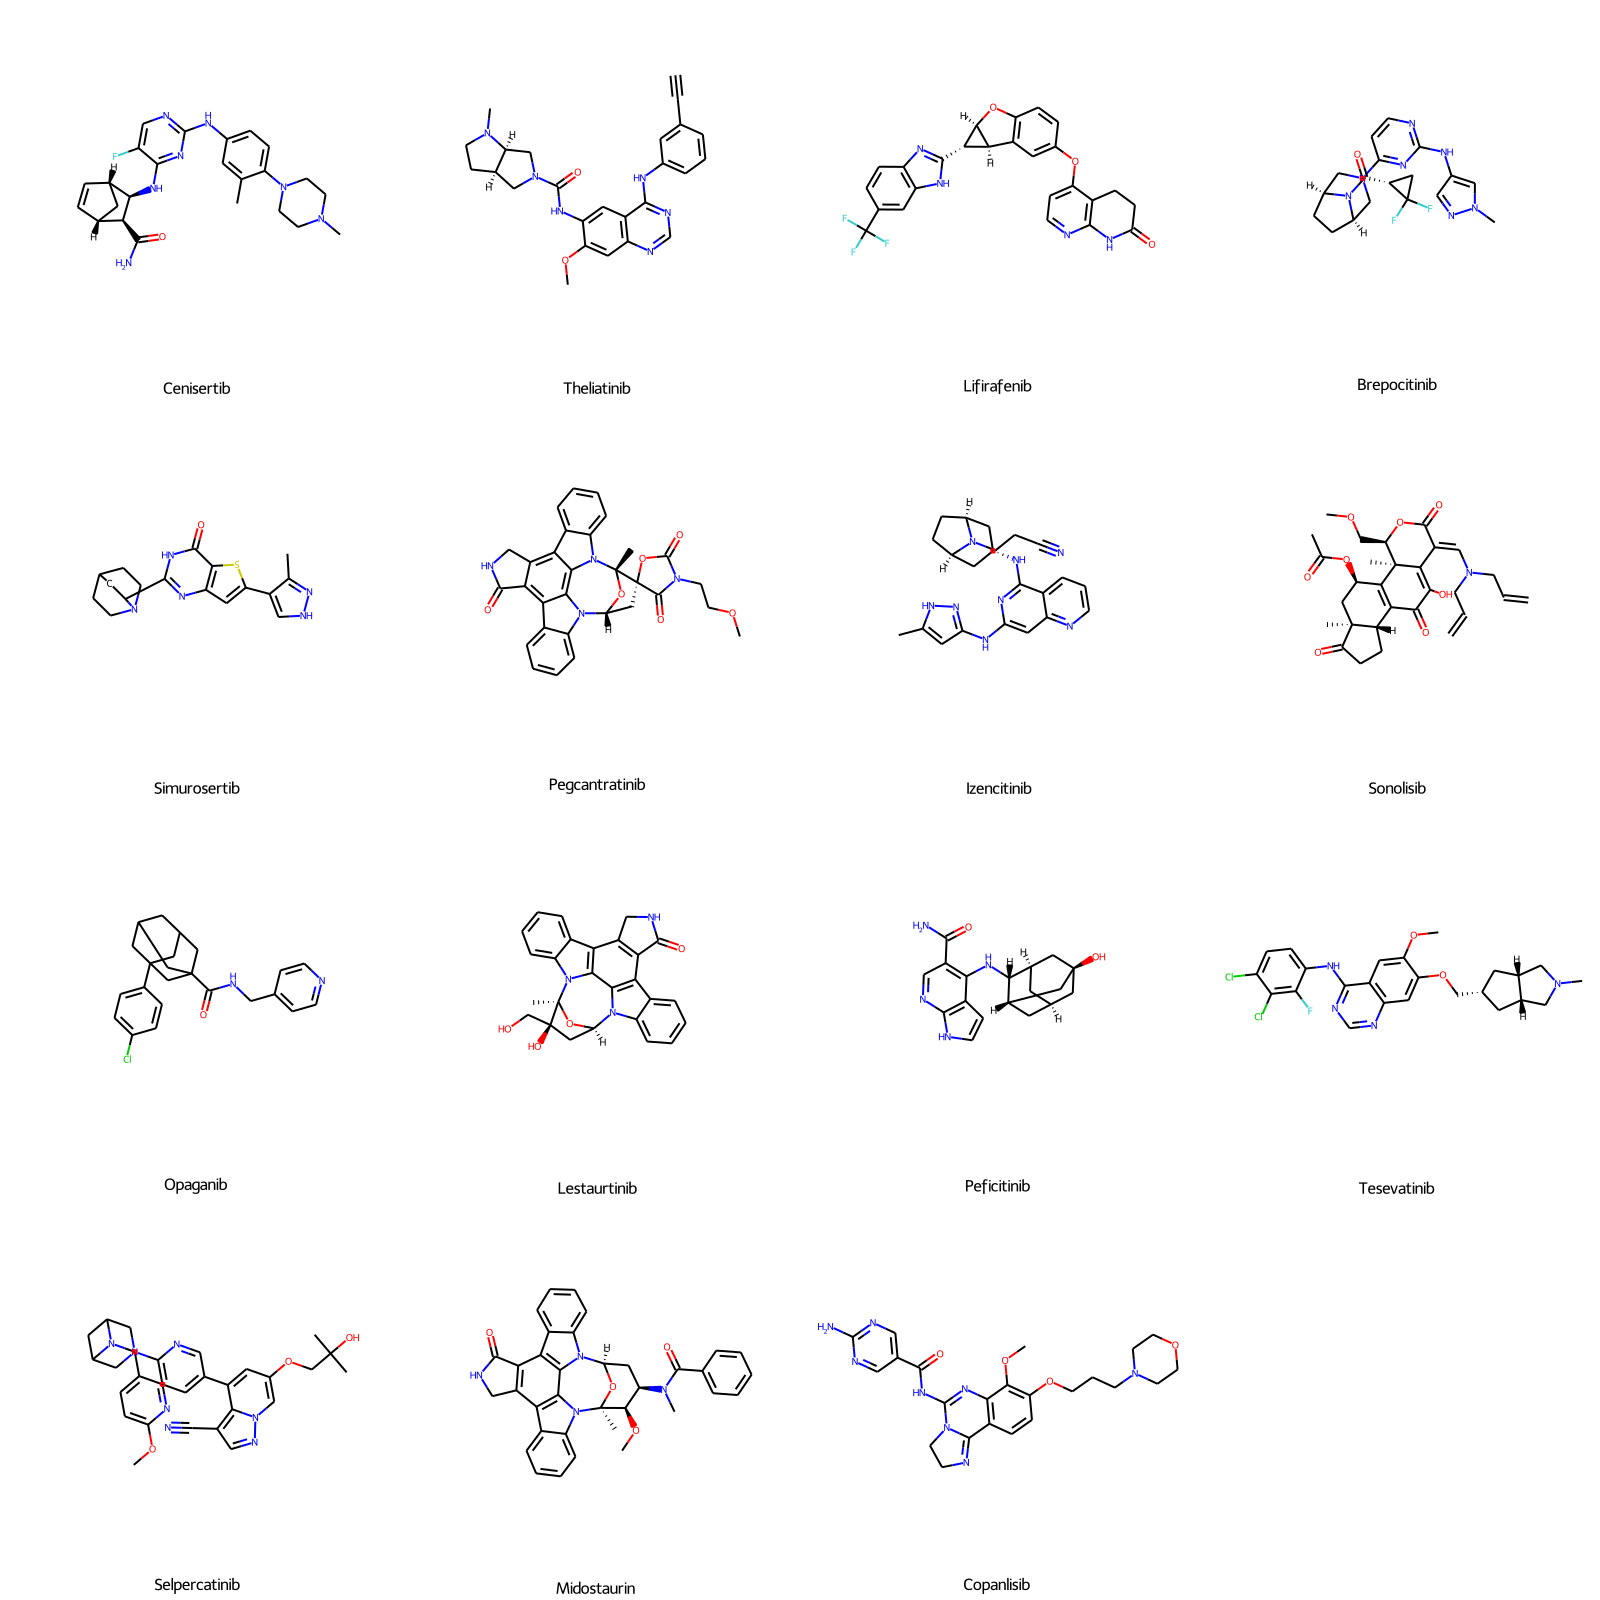

In [27]:
print(len(bridge_mols))
Draw.MolsToGridImage(bridge_mols, molsPerRow=4, legends=[item.GetProp('_Name') for item in bridge_mols],subImgSize=(400,400), )  

<Figure size 432x288 with 0 Axes>

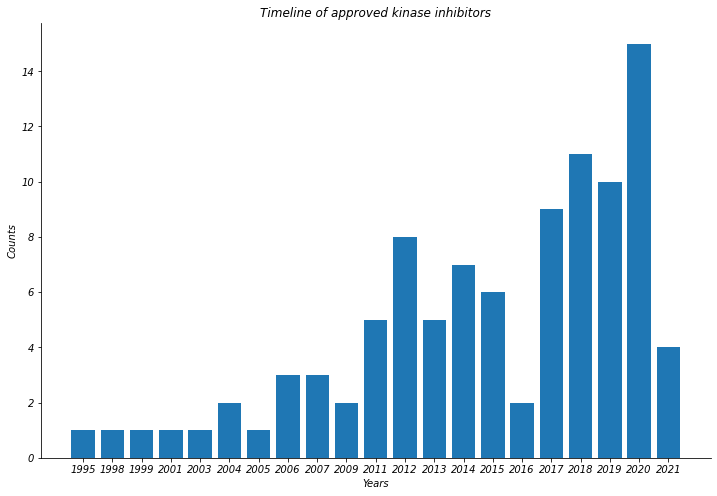

In [85]:
import math 
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
names= '1995 1998 1999 2001 2003 2004 2005 2006 2007 2009 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021'
name = [str(item) for item in names.split()]
number = [1,1,1,1,1,2,1,3,3,2,5,8,5,7,6,2,9,11,10,15,4]
params={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.weight':'500',
        }
figure = plt.figure(1,)
plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.rcParams.update(params)
plt.title('Timeline of approved kinase inhibitors')  # 图形标题
plt.xlabel('Years') 
plt.ylabel('Counts')  # 纵坐标轴标题



plt.bar(range(len(name)), number, tick_label=name)
plt.savefig('timeline_of_KI.png')


In [47]:
from scipy.stats import norm,mode
import matplotlib.pyplot as plt
import numpy as np 
from pathlib import Path
p=Path("/home/chengyj/kinase_work/Bridged_ring/chembl_rings/KI_chembl/data_refined")
dat = sorted(list(p.glob("**/*fsp3")))
all_data = {}
for item in dat:
    with item.open() as f:
        all_data[item.parts[-1].split(".")[0]] = np.array([float(item) for item in f.read().split() ])

for key in all_data:
    print(f"{key:>10} {all_data[key].size:>8} {np.mean(all_data[key]):.3f} {np.std(all_data[key]):.3f} {np.percentile(all_data[key],1):.3f} {np.percentile(all_data[key],25):.3f} {np.median(all_data[key]):.3f} {np.percentile(all_data[key],75):.3f} {np.percentile(all_data[key],99):.3f}")


 chembl_ac  2084723 0.345 0.211 0.000 0.188 0.320 0.471 0.944
 chembl_ki   118516 0.274 0.162 0.000 0.154 0.267 0.375 0.704
  pkidb_ki      304 0.297 0.135 0.040 0.192 0.286 0.392 0.599


{'whiskers': [<matplotlib.lines.Line2D at 0x7f881624bb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f881a2b2100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f881624b850>,
 'medians': [<matplotlib.lines.Line2D at 0x7f881a2b26a0>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x7f881a2b2970>,
  <matplotlib.lines.Line2D at 0x7f881a2cd100>]}

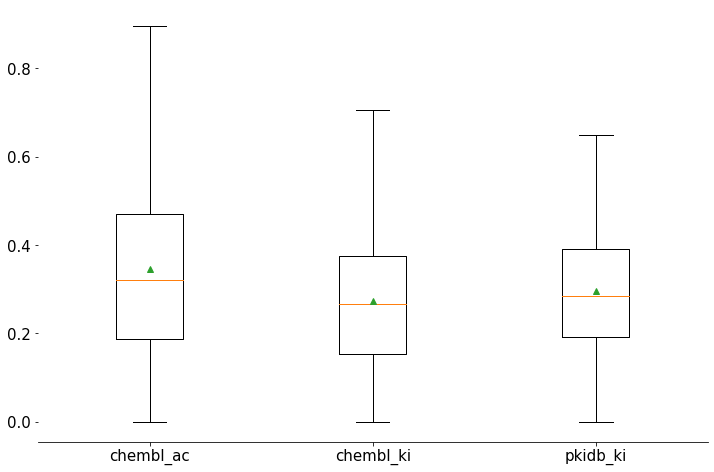

In [67]:
params={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.weight':'500',
        }
plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.rcParams.update(params)
plt.boxplot(list(all_data.values()),labels=all_data.keys(),showfliers=False,showmeans=True)

In [66]:
import openpyxl

workbook = openpyxl.Workbook()
sheet1 = workbook.create_sheet("fsp3s")
ind_col = 1
for key in all_data:
    sheet1.cell(ind_col,1,key)
    ind_row = 2
    for item in all_data[key][0:1048575]:
        sheet1.cell(row = ind_row,column = ind_col,value=item)
        ind_row += 1
    ind_col += 1
workbook.save("fsp3s.xlsx")

        